In [162]:
# Dependencies and Setup
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import pandas as pd
import numpy as np

# Hide warning messages in notebook
import warnings
warnings.filterwarnings('ignore')

# File to Load (Remember to Change These)
mouse_drug_data_to_load = "data/mouse_drug_data.csv"
clinical_trial_data_to_load = "data/clinicaltrial_data.csv"

# Read the Mouse and Drug Data and the Clinical Trial Data
mouse_df = pd.read_csv(mouse_drug_data_to_load)
trial_df = pd.read_csv(clinical_trial_data_to_load)

# Combine the data into a single dataset
mouse_trials_df = pd.merge(mouse_df,trial_df, on="Mouse ID")

# Display the data table for preview
mouse_trials_df



,Mouse ID,Drug,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,f234,Stelasyn,0,45.000000,0
1,f234,Stelasyn,5,47.313491,0
2,f234,Stelasyn,10,47.904324,0
3,f234,Stelasyn,15,48.735197,1
4,f234,Stelasyn,20,51.112713,2
...,...,...,...,...,...
1901,j235,Placebo,0,45.000000,0
1902,j235,Placebo,5,46.588820,0
1903,j235,Placebo,10,48.018788,1
1904,j235,Placebo,15,51.161138,1


## Tumor Response to Treatment

In [163]:
# Store the Mean Tumor Volume Data Grouped by Drug and Timepoint 
sitedropped_df = mouse_trials_df.drop(['Metastatic Sites'],axis=1)
grouped_df = sitedropped_df.groupby(['Drug', 'Timepoint'], as_index=False)
mouse_trials_avg_df = grouped_df.agg("mean")


# Preview DataFrame
mouse_trials_avg_df


,Drug,Timepoint,Tumor Volume (mm3)
0,Capomulin,0,45.000000
1,Capomulin,5,44.266086
2,Capomulin,10,43.084291
3,Capomulin,15,42.064317
4,Capomulin,20,40.716325
...,...,...,...
95,Zoniferol,25,55.432935
96,Zoniferol,30,57.713531
97,Zoniferol,35,60.089372
98,Zoniferol,40,62.916692


In [164]:
# Store the Standard Error of Tumor Volumes Grouped by Drug and Timepoint
mouse_trials_sem_df = grouped_df.agg({'Tumor Volume (mm3)' : 'sem'})

# Preview DataFrame
mouse_trials_sem_df


,Drug,Timepoint,Tumor Volume (mm3)
0,Capomulin,0,0.000000
1,Capomulin,5,0.448593
2,Capomulin,10,0.702684
3,Capomulin,15,0.838617
4,Capomulin,20,0.909731
...,...,...,...
95,Zoniferol,25,0.602513
96,Zoniferol,30,0.800043
97,Zoniferol,35,0.881426
98,Zoniferol,40,0.998515


In [165]:
# Minor Data Munging to Re-Format the Data Frames
mouse_trials_avgpivot_df = mouse_trials_avg_df.pivot(index='Timepoint', columns='Drug', values='Tumor Volume (mm3)')
mouse_trials_sempivot_df = mouse_trials_sem_df.pivot(index='Timepoint', columns='Drug', values='Tumor Volume (mm3)')
# Preview that Reformatting worked
mouse_trials_avgpivot_df

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000
5,44.266086,46.503051,47.062001,47.389175,46.796098,47.125589,47.248967,43.944859,47.527452,46.851818
10,43.084291,48.285125,49.403909,49.582269,48.694210,49.423329,49.101541,42.531957,49.463844,48.689881
15,42.064317,50.094055,51.296397,52.399974,50.933018,51.359742,51.067318,41.495061,51.529409,50.779059
20,40.716325,52.157049,53.197691,54.920935,53.644087,54.364417,53.346737,40.238325,54.067395,53.170334
25,39.939528,54.287674,55.715252,57.678982,56.731968,57.482574,55.504138,38.974300,56.166123,55.432935
30,38.769339,56.769517,58.299397,60.994507,59.559509,59.809063,58.196374,38.703137,59.826738,57.713531
35,37.816839,58.827548,60.742461,63.371686,62.685087,62.420615,60.350199,37.451996,62.440699,60.089372
40,36.958001,61.467895,63.162824,66.068580,65.600754,65.052675,63.045537,36.574081,65.356386,62.916692


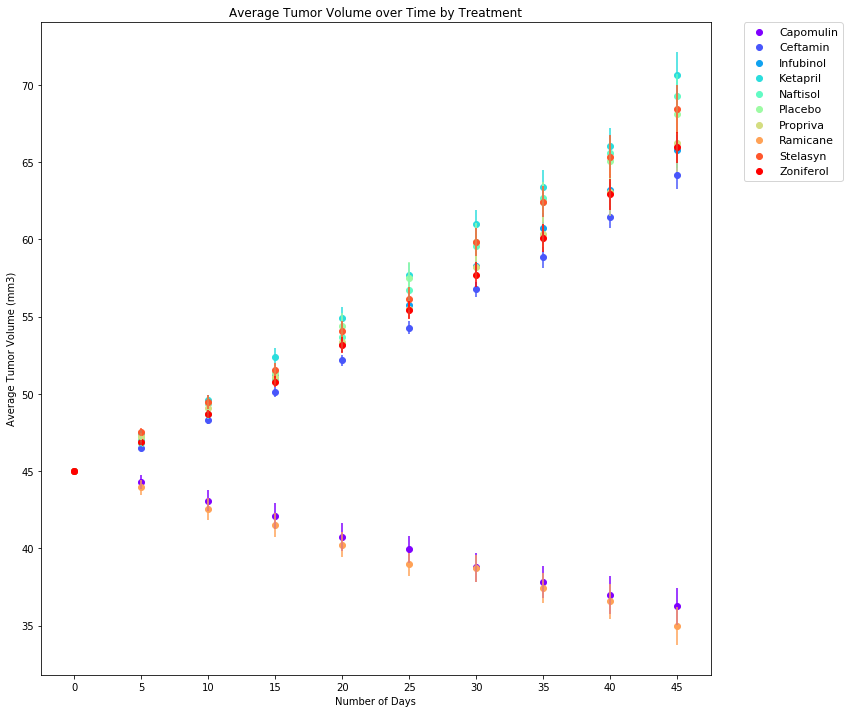

In [166]:
# Generate the Plot (with Error Bars)
colors = cm.rainbow(np.linspace(0, 1, len(mouse_trials_avgpivot_df)))

plt.figure(0, figsize=(12,12))
for col, color in zip(mouse_trials_avgpivot_df.columns, colors):
    plt.errorbar(mouse_trials_avgpivot_df.index, mouse_trials_avgpivot_df[col].tolist(), yerr=mouse_trials_sempivot_df[col].tolist(), fmt='None', ecolor=color)
    plt.scatter(mouse_trials_avgpivot_df.index, mouse_trials_avgpivot_df[col].tolist(), color=color)

plt.legend(['{}'.format(col) for col in mouse_trials_avgpivot_df.columns], loc=2, bbox_to_anchor=(1.05, 1), borderaxespad=0., fontsize=11)
plt.ylabel("Average Tumor Volume (mm3)")
plt.xticks(np.arange(0, 50, step=5))
plt.xlabel("Number of Days")
plt.title("Average Tumor Volume over Time by Treatment")

# Save the Figure
tumorfig = plt.figure(0)


![Tumor Response to Treatment](../Images/treatment.png)

## Metastatic Response to Treatment

In [167]:
# Store the Mean Met. Site Data Grouped by Drug and Timepoint 
tumordropped_df = mouse_trials_df.drop(['Tumor Volume (mm3)'],axis=1)
grouped_df = tumordropped_df.groupby(['Drug', 'Timepoint'], as_index=False)
metastatic_avg_df = grouped_df.agg("mean")

# Preview DataFrame
metastatic_avg_df.head()

,Drug,Timepoint,Metastatic Sites
0,Capomulin,0,0.000000
1,Capomulin,5,0.160000
2,Capomulin,10,0.320000
3,Capomulin,15,0.375000
4,Capomulin,20,0.652174


In [168]:
# Store the Standard Error associated with Met. Sites Grouped by Drug and Timepoint 
metastatic_sem_df = grouped_df.agg({'Metastatic Sites' : 'sem'})

# Preview DataFrame
metastatic_sem_df.head()

,Drug,Timepoint,Metastatic Sites
0,Capomulin,0,0.000000
1,Capomulin,5,0.074833
2,Capomulin,10,0.125433
3,Capomulin,15,0.132048
4,Capomulin,20,0.161621


In [169]:
# Minor Data Munging to Re-Format the Data Frames
metastatic_avgpivot_df = metastatic_avg_df.pivot(index='Timepoint', columns='Drug', values='Metastatic Sites')
metastatic_sempivot_df = metastatic_sem_df.pivot(index='Timepoint', columns='Drug', values='Metastatic Sites')

# Preview that Reformatting worked
metastatic_avgpivot_df

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.160000,0.380952,0.280000,0.304348,0.260870,0.375000,0.320000,0.120000,0.240000,0.166667
10,0.320000,0.600000,0.666667,0.590909,0.523810,0.833333,0.565217,0.250000,0.478261,0.500000
15,0.375000,0.789474,0.904762,0.842105,0.857143,1.250000,0.764706,0.333333,0.782609,0.809524
20,0.652174,1.111111,1.050000,1.210526,1.150000,1.526316,1.000000,0.347826,0.952381,1.294118
25,0.818182,1.500000,1.277778,1.631579,1.500000,1.941176,1.357143,0.652174,1.157895,1.687500
30,1.090909,1.937500,1.588235,2.055556,2.066667,2.266667,1.615385,0.782609,1.388889,1.933333
35,1.181818,2.071429,1.666667,2.294118,2.266667,2.642857,2.300000,0.952381,1.562500,2.285714
40,1.380952,2.357143,2.100000,2.733333,2.466667,3.166667,2.777778,1.100000,1.583333,2.785714


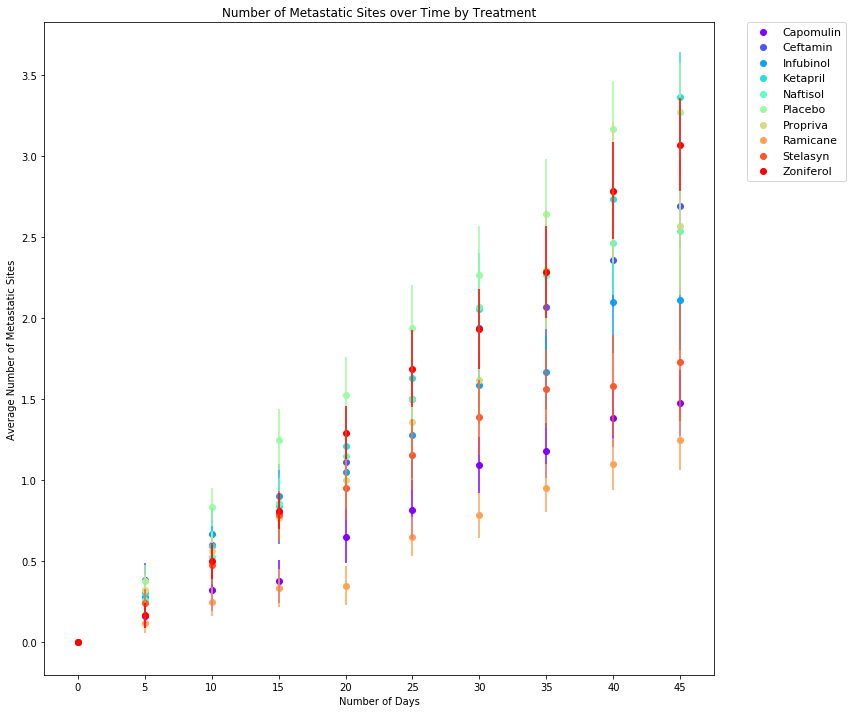

In [170]:
# Generate the Plot (with Error Bars)
colors = cm.rainbow(np.linspace(0, 1, len(metastatic_avgpivot_df)))

plt.figure(1, figsize=(12,12))
for col, color in zip(metastatic_avgpivot_df.columns, colors):
    plt.errorbar(metastatic_avgpivot_df.index, metastatic_avgpivot_df[col].tolist(), yerr=metastatic_sempivot_df[col].tolist(), fmt='None', ecolor=color)
    plt.scatter(metastatic_avgpivot_df.index, metastatic_avgpivot_df[col].tolist(), color=color)

plt.legend(['{}'.format(col) for col in metastatic_avgpivot_df.columns], loc=2, bbox_to_anchor=(1.05, 1), borderaxespad=0., fontsize=11)
plt.ylabel("Average Number of Metastatic Sites")
plt.xticks(np.arange(0, 50, step=5))
plt.xlabel("Number of Days")
plt.title("Number of Metastatic Sites over Time by Treatment")

# Save the Figure
sitesfig = plt.figure(1)

![Metastatic Spread During Treatment](../Images/spread.png)

## Survival Rates

In [171]:
# Store the Count of Mice Grouped by Drug and Timepoint (W can pass any metric)

dropped_df = mouse_trials_df.drop(['Metastatic Sites','Tumor Volume (mm3)'],axis=1)
grouped_df = dropped_df.groupby(['Drug', 'Timepoint'], as_index=False)


mousecount_df = grouped_df.agg({'Mouse ID' : pd.Series.nunique})
mousecount_df.rename(columns = {'Mouse ID':'Mouse Count'}, inplace = True)
# Convert to DataFrame

# Preview DataFrame
mousecount_df

,Drug,Timepoint,Mouse Count
0,Capomulin,0,25
1,Capomulin,5,25
2,Capomulin,10,25
3,Capomulin,15,24
4,Capomulin,20,23
...,...,...,...
95,Zoniferol,25,16
96,Zoniferol,30,15
97,Zoniferol,35,14
98,Zoniferol,40,14


In [172]:
# Minor Data Munging to Re-Format the Data Frames
pivot_mouse_count_df = mousecount_df.pivot(index='Timepoint', columns='Drug', values='Mouse Count')
# Preview the Data Frame
pivot_mouse_count_df.head()

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,25,25,25,25,25,25,25,25,25,25
5,25,21,25,23,23,24,24,25,24,24
10,25,20,21,22,21,24,22,24,22,22
15,24,19,21,19,21,20,16,24,22,21
20,23,18,20,19,20,19,16,23,20,17


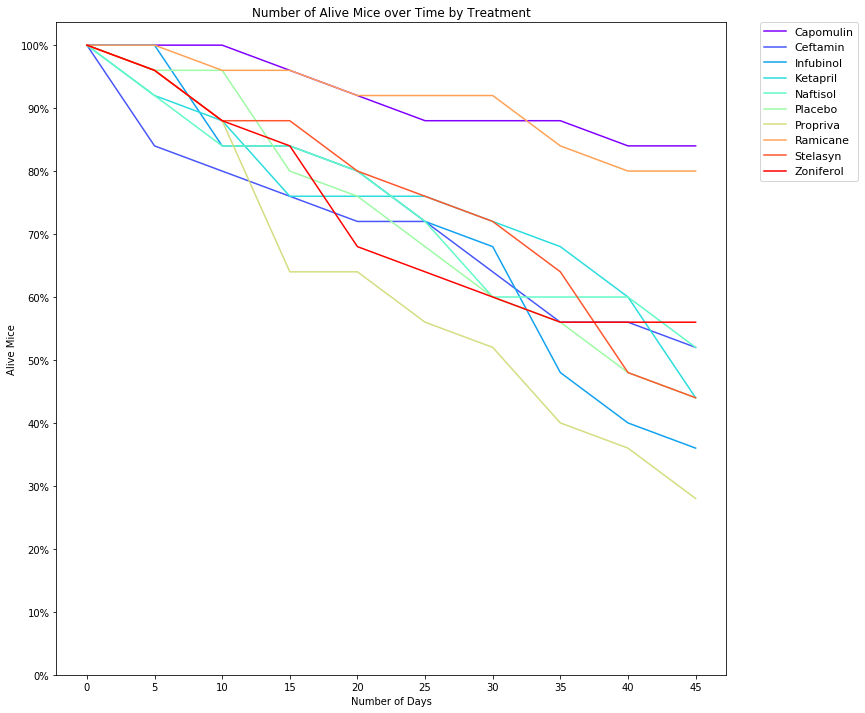

In [173]:
# Generate the Plot (Accounting for percentages)
colors = cm.rainbow(np.linspace(0, 1, len(pivot_mouse_count_df)))

plt.figure(2, figsize=(12,12))
for col, color in zip(pivot_mouse_count_df.columns, colors):
    plt.plot(pivot_mouse_count_df.index, pivot_mouse_count_df[col].tolist(), color=color)

plt.legend(['{}'.format(col) for col in pivot_mouse_count_df.columns], loc=2, bbox_to_anchor=(1.05, 1), borderaxespad=0., fontsize=11)
plt.ylabel("Alive Mice")
plt.xticks(np.arange(0, 50, step=5))
plt.yticks(np.arange(0, 27.5, step=2.5), ('0%','10%','20%','30%','40%','50%','60%','70%','80%','90%','100%'))
plt.xlabel("Number of Days")
plt.title("Number of Alive Mice over Time by Treatment")
# Save the Figure
micealivefig=plt.figure(2)
# Show the Figure


![Metastatic Spread During Treatment](../Images/survival.png)

## Summary Bar Graph

In [197]:
# Calculate the percent changes for each drug
pctChange = {}
for col in mouse_trials_avgpivot_df.columns:
    if mouse_trials_avgpivot_df[col][0] > mouse_trials_avgpivot_df[col].min():
        pctChange[col] = ((mouse_trials_avgpivot_df[col].min() - mouse_trials_avgpivot_df[col][0]) / mouse_trials_avgpivot_df[col][0]) * 100
    else:
        pctChange[col] = ((mouse_trials_avgpivot_df[col].max() - mouse_trials_avgpivot_df[col][0]) / mouse_trials_avgpivot_df[col][0]) * 100
# Display the data to confirm
pctChange_df = pd.DataFrame(list(pctChange.items()), columns=['Drug', '% Change in Tumor Size'])
pctChange_df.sort_values(by='% Change in Tumor Size',axis=0, ascending=True,inplace=True)
pctChange_df = pctChange_df.reset_index(drop=True)
pctChange_df

,Drug,% Change in Tumor Size
0,Ramicane,-22.320900
1,Capomulin,-19.475303
2,Ceftamin,42.516492
3,Infubinol,46.123472
4,Zoniferol,46.579751
5,Propriva,47.241175
6,Placebo,51.297960
7,Stelasyn,52.085134
8,Naftisol,53.923347
9,Ketapril,57.028795


Text(0.5, 1.0, '% Change in Tumor Size by Treatment')

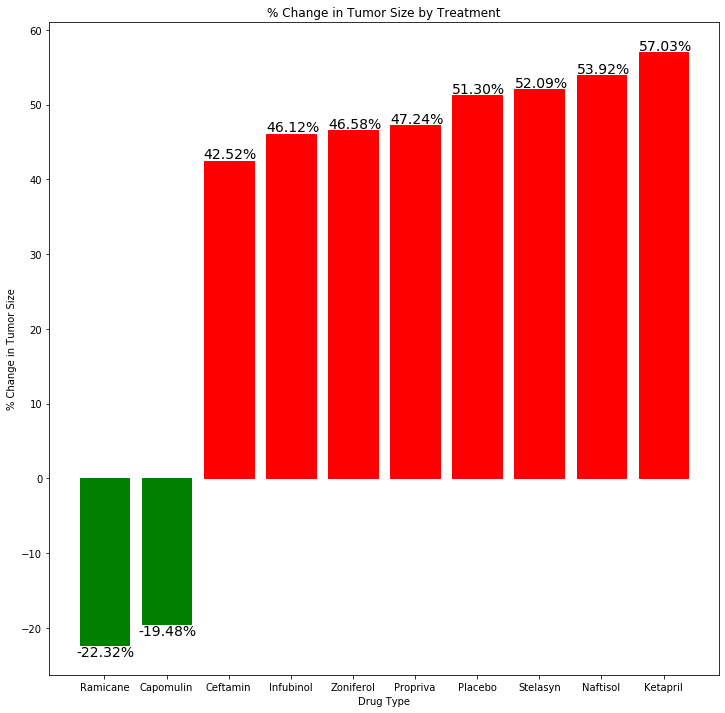

In [230]:

plt.figure(3, figsize=(12,12))
tumorbar = plt.bar(x=np.arange(0,len(pctChange_df),step=1),height=pctChange_df['% Change in Tumor Size'],tick_label=pctChange_df['Drug'])

#set colors and label each bar with value
for i in range(len(tumorbar)):
    if tumorbar[i].get_height()<0:
        tumorbar[i].set_color('g')
        plt.text(i-0.45,tumorbar[i].get_height()-1.5,str('%.2f'%(pctChange_df['% Change in Tumor Size'][i])) + "%",fontsize=14)
    else:
        tumorbar[i].set_color('r')
        plt.text(i-0.4,tumorbar[i].get_height()+0.25,str('%.2f'%(pctChange_df['% Change in Tumor Size'][i])) + "%",fontsize=14)


#set labels
plt.ylabel("% Change in Tumor Size")
plt.xlabel("Drug Type")
plt.title("% Change in Tumor Size by Treatment")

# Save the Figure
pctbarfig = plt.figure(3)

# Show the Figure


![Metastatic Spread During Treatment](../Images/change.png)

## Observations

1) Ramicane and Capomulin appear to be the treatments that actually treat the tumor growth by every metric -- Tumor Size, Mice Mortality, and cancer spread (Metastatic Sites)
2) Propriva is the worst treatment in terms of mortality rate, but still beats placebo and other drugs in terms of cancer reduction
3) Mortality rate in the mice seems heavily correlated with tumor size. Metastatic sites seems to be just an attached variable to tumor size. From what little I know about oncology, this makes sense as more cancer leads to more chances for it to spread, and more cancer tends to kill. However, I would need to do hypothesis testing to confirm this correlation.